In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Tìm hiểu dữ liệu

In [142]:
# Xem tổng quan dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [143]:
# Mô tả feature
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

* Person ID: Mã định danh duy nhất cho mỗi cá nhân
* Gender: Giới tính của người đó (Nam/Nữ)
* Age: Tuổi của người tính theo năm (27-59)
* Occupation:    của con người (11 nghề khác nhau)
* Sleep Duration: Số giờ ngủ mỗi ngày (5.8-8.5 giờ)
* Quality of Sleep: Đánh giá chủ quan về chất lượng giấc ngủ (thang điểm: 4-9)
* Physical Activity Level: Số phút hoạt động thể chất mỗi ngày (30-90 phút)
* Stress Level: Đánh giá chủ quan về mức độ căng thẳng (thang điểm: 4-8)
* BMI Category: Danh mục chỉ số khối cơ thể (Thiếu cân, Bình thường, Thừa cân, Béo phì)
* Blood Pressure: Đo huyết áp (tâm thu/tâm trương)
* Heart Rate: Nhịp tim khi nghỉ ngơi tính bằng nhịp mỗi phút (65-86 bpm)
* Daily Steps: Số bước đi được mỗi ngày (3.000-10.000)
* Sleep Disorder: Các triệu chứng rối loạn giấc ngủ (Không có, Mất ngủ, Ngưng thở khi ngủ)

In [144]:
# Index -> Person ID
df.set_index("Person ID", inplace=True)

In [145]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [146]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [35]:
df.describe(include="O")

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


### Biểu đồ tương quan các đặc trưng

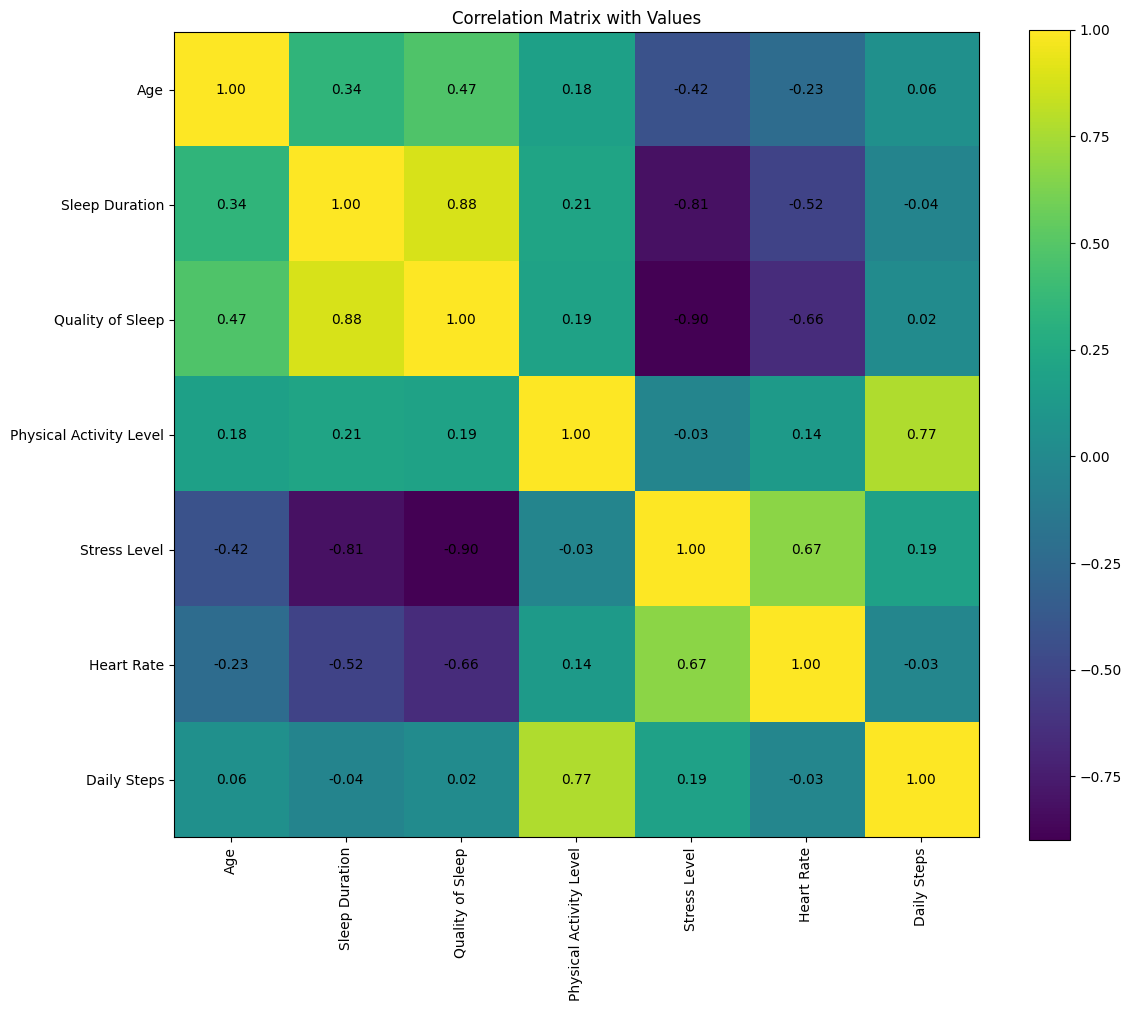

In [36]:
# tương quan các feature
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
plt.imshow(corr, interpolation='nearest')

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Add colorbar
plt.colorbar()

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center')

plt.title("Correlation Matrix with Values")
plt.tight_layout()
plt.show()

## Tiền xử lý

#### Xử lý dữ liệu NaN

In [136]:
nullDT = (df['Sleep Disorder'].isnull().sum()/df.shape[0])*100
print(f'Dữ liệu NaN của cột Quality of Sleep: {nullDT}%')

Dữ liệu NaN của cột Quality of Sleep: 58.55614973262032%


In [149]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("none")

In [138]:
df["Sleep Disorder"].isnull().sum()

0

In [147]:
df['Blood Pressure'] = df['Blood Pressure'].astype(str)
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

df.drop('Blood Pressure', axis=1, inplace=True)

#### Trực quan các đặc trưng

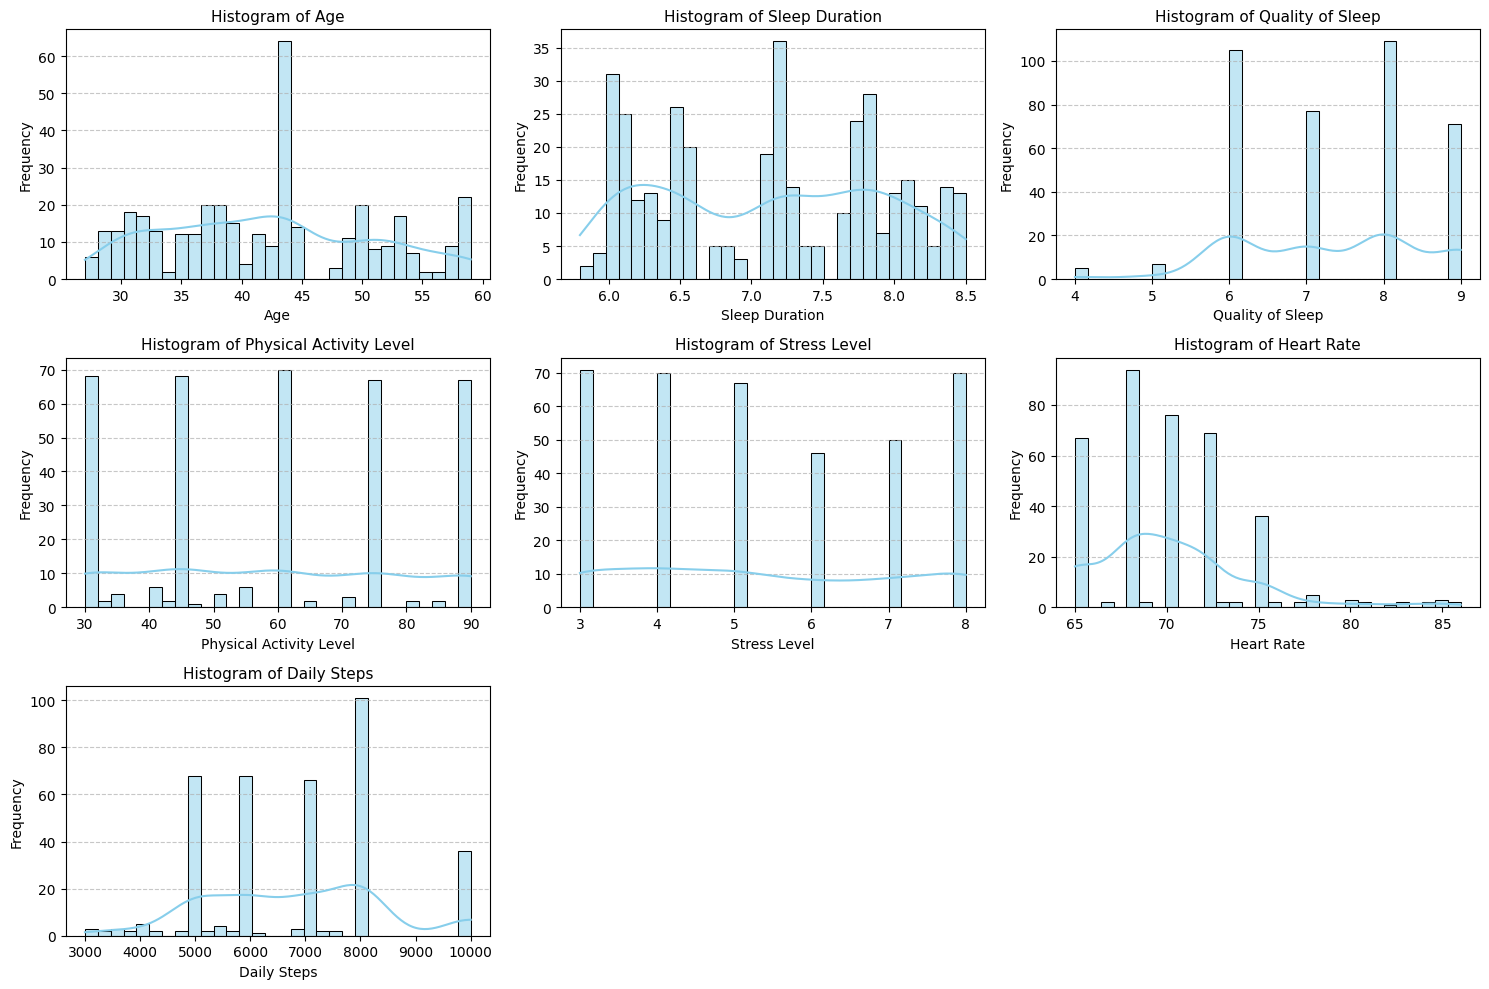

In [134]:
# tổng quan phân bố dữ liệu
numeric_cols = df.select_dtypes(include=['int64','float']).columns.tolist()

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

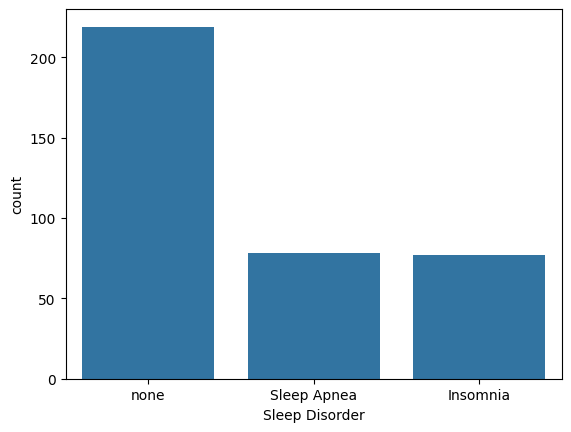

In [150]:
# phân bố các triệu chứng rối loạn giấc ngủ
sns.countplot(x="Sleep Disorder", data=df);

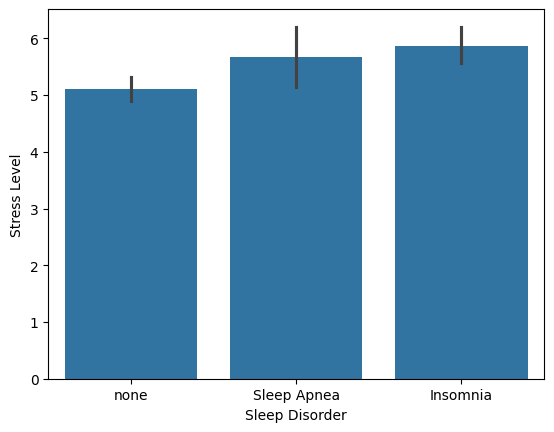

In [42]:
# mối quan hệ giữa Stress Level và Sleep Disorder
sns.barplot(x="Sleep Disorder", y="Stress Level", data=df);

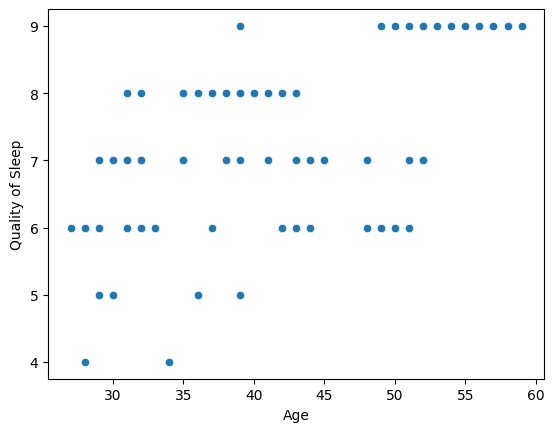

In [151]:
sns.scatterplot(x="Age", y="Quality of Sleep", data=df);

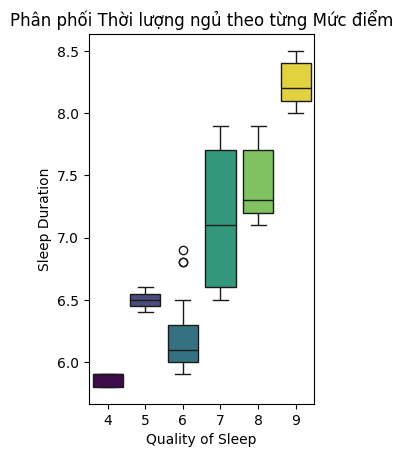

In [152]:
plt.subplot(1, 2, 1)
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df, 
            hue='Quality of Sleep', palette='viridis', legend=False)
plt.title('Phân phối Thời lượng ngủ theo từng Mức điểm');

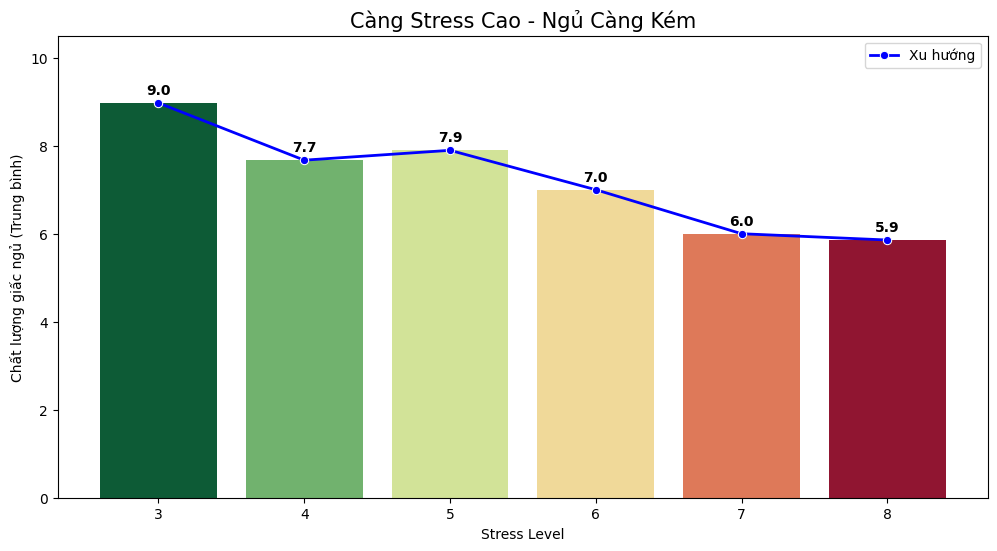

In [45]:
avg_data = df.groupby('Stress Level')['Quality of Sleep'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Bar chart
sns.barplot(
    x='Stress Level',
    y='Quality of Sleep',
    hue='Stress Level',
    data=avg_data,
    palette='RdYlGn_r',
    legend=False
)

# Line chart
sns.lineplot(
    data=avg_data,
    x=avg_data.index,
    y='Quality of Sleep',
    marker='o',
    color='blue',
    linewidth=2,
    label='Xu hướng'
)

# Thêm số lên đầu cột
for index, row in avg_data.iterrows():
    plt.text(index, row['Quality of Sleep'] + 0.2, f"{row['Quality of Sleep']:.1f}",
             color='black', ha="center", fontweight='bold')

plt.title('Càng Stress Cao - Ngủ Càng Kém', fontsize=15)
plt.ylim(0, 10.5)
plt.ylabel('Chất lượng giấc ngủ (Trung bình)')
plt.show()

#### Xử lý dữ liệu dạng chữ (Categorical)

In [153]:
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#### Tạo nhãn phân loại Quality of Sleep

In [154]:
def lable_quality(x):
    if x <= 5:
        return 0
    elif x <= 7:
        return 1
    else:
        return 2

df['SleepQualityLabel'] = df['Quality of Sleep'].apply(lable_quality)

In [155]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,SleepQualityLabel
Person ID,,,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,3,77,4200,2,126,83,1
2,1,28,1,6.2,6,60,8,0,75,10000,2,125,80,1
3,1,28,1,6.2,6,60,8,0,75,10000,2,125,80,1
4,1,28,6,5.9,4,30,8,2,85,3000,1,140,90,0
5,1,28,6,5.9,4,30,8,2,85,3000,1,140,90,0


#### Split dataset &#8594; X,y

In [156]:
X = df.drop(['Quality of Sleep', 'SleepQualityLabel', 'Daily Steps'], axis=1)
y = df['SleepQualityLabel']

In [157]:
X.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic
Person ID,,,,,,,,,,,
1,1,27,9,6.1,42,6,3,77,2,126,83
2,1,28,1,6.2,60,8,0,75,2,125,80
3,1,28,1,6.2,60,8,0,75,2,125,80
4,1,28,6,5.9,30,8,2,85,1,140,90
5,1,28,6,5.9,30,8,2,85,1,140,90


In [158]:
y.head()

Person ID
1    1
2    1
3    1
4    0
5    0
Name: SleepQualityLabel, dtype: int64

#### X,y &#8594; X_train, y_train, X_valid, y_valid

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [160]:
X.shape

(374, 11)

In [161]:
X_train.shape

(299, 11)

In [162]:
X_valid.shape

(75, 11)

## Training Model

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [164]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42)
decision_tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [165]:
decision_tree.score(X_valid, y_valid)

0.96

In [166]:
decision_tree.score(X_train, y_train)

0.9899665551839465

In [167]:
y_preds = decision_tree.predict(X_valid)

In [168]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.98      0.95      0.96        42
           2       0.94      1.00      0.97        30

    accuracy                           0.96        75
   macro avg       0.97      0.87      0.91        75
weighted avg       0.96      0.96      0.96        75



In [169]:
# Random Forest
random_forest = RandomForestClassifier( random_state = 0)
random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [170]:
random_forest.score(X_valid, y_valid)

0.9733333333333334

In [171]:
random_forest.score(X_valid, y_valid)

0.9733333333333334

In [172]:
y_rf_pre = random_forest.predict(X_valid)

In [173]:
print(classification_report(y_valid, y_rf_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.95      0.98        42
           2       0.94      1.00      0.97        30

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



### Cross-validation

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 42)
rf_cv = RandomForestClassifier(random_state = 0)

In [176]:
# decision tree
dt_scores = cross_val_score(dt_cv, X, y, scoring = 'accuracy', cv = 5)

In [177]:
dt_scores.mean(), dt_scores.std()

(0.8986666666666666, 0.11363880401420007)

In [178]:
# random forest
rf_scores = cross_val_score(rf_cv, X, y, scoring = 'accuracy', cv = 5)
rf_scores

array([0.94666667, 0.97333333, 0.93333333, 0.97333333, 0.95945946])

In [179]:
rf_scores.mean(), rf_scores.std()

(0.9572252252252254, 0.01553215859606631)

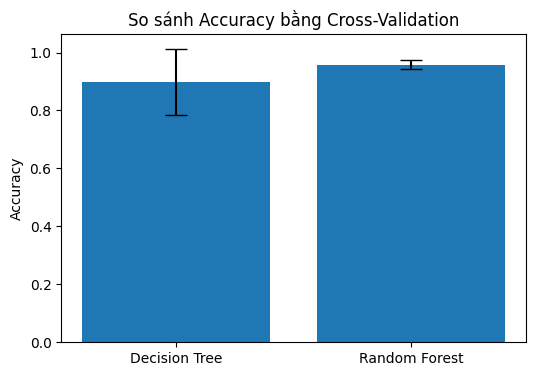

In [180]:
models = ["Decision Tree", "Random Forest"]
means = [dt_scores.mean(), rf_scores.mean()]
stds = [dt_scores.std(), rf_scores.std()]

plt.figure(figsize=(6,4))
plt.bar(models, means, yerr=stds, capsize=8)
plt.ylabel("Accuracy")
plt.title("So sánh Accuracy bằng Cross-Validation")
plt.show()

In [181]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    decision_tree,
    X, y,
    cv=5,         
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

In [182]:
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

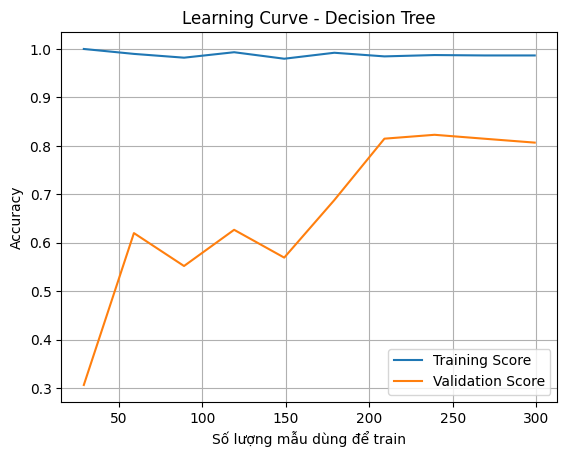

In [183]:
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, val_mean, label="Validation Score")
plt.xlabel("Số lượng mẫu dùng để train")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

In [184]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=random_forest,
    X=X, y=y,
    cv=5,
    n_jobs=-1,
    train_sizes=train_sizes,
    scoring='accuracy',
    random_state=42
)

In [185]:
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

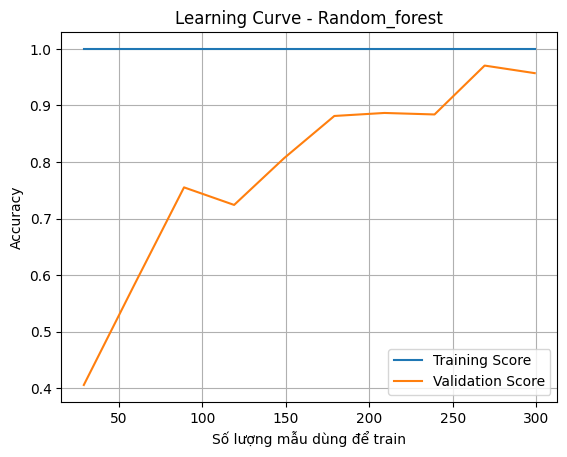

In [186]:
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, val_mean, label="Validation Score")
plt.xlabel("Số lượng mẫu dùng để train")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random_forest")
plt.legend()
plt.grid(True)
plt.show()